In [36]:
import numpy as np
import matplotlib.pyplot as plt

In [37]:
def generate_data():
    size = 1000
    x = np.linspace(0, 1, size)
    y = -10*x + 5
    y += 15*np.logical_and(x > 0.75, x < 0.8).astype(float)
    return x, y

# 1. Inspect the data (0.5 points)

Using `matplotlib`, create a scatter plot of the data returned by `generate_data()`.
What is out of the ordinary about this line?

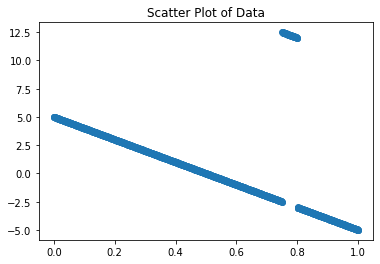

In [38]:
x, y = generate_data()
plt.scatter(x, y)
plt.title("Scatter Plot of Data")
plt.show()

**The thing that is out of the ordinary about the line is that between the values of 0.75 and 0.8  the values have been shiffed up by a certain amount creating a discontinuity in the line.**

# 2. Implement linear regression (2.5 points)

Implement a basic linear regression model which is fit to the data from `generate_data` using gradient descent.
Your model should take the form `y = m*x + b`, where `y` is the output, `x` is the input, `m` is a weight parameter, and `b` is a bias parameter.
You must use only `numpy` and derive any derivatives yourself (i.e. no autograd from TensorFlow, MXNet, Pytorch, JAX etc!).
You should use a squared-error loss function.
You are welcome to use any technique you want to decide when to stop training.
Make sure you tune your optimization hyperparameters so that the model converges.
Print out or plot the loss over the course of training.

Loss:  39.4348405274543
Loss:  25.961115826671396
Loss:  20.486018655515398
Loss:  18.094494983047937
Loss:  16.89849686569561
Loss:  16.17249210237592
Loss:  15.637420770661297
Loss:  15.185703724856472
Loss:  14.775633635483594
Loss:  14.390816078545537
Loss:  14.02459260598648
Loss:  13.674057971805505
Loss:  13.337761940302505
Loss:  13.014826150637811
Loss:  12.70460444342935
Loss:  12.406551919688196
Loss:  12.120174181016688
Loss:  11.845007381292255
Loss:  11.580610129040739
Loss:  11.32655995805962
Loss:  11.082451568859298
Loss:  10.847895765948305
Loss:  10.622518677509968
Loss:  10.40596109809402
Loss:  10.197877892546103
Loss:  9.997937436902385
Loss:  9.80582108640139
Loss:  9.621222666325348
Loss:  9.44384798353861
Loss:  9.273414357437328
Loss:  9.109650169368036
Loss:  8.952294429722214
Loss:  8.801096361988181
Loss:  8.655815003086431
Loss:  8.516218819347152
Loss:  8.382085337516346
Loss:  8.253200790201866
Loss:  8.129359775194025
Loss:  8.010364928117808
Loss:  7.8

array([-9.8890179 ,  5.77777245])

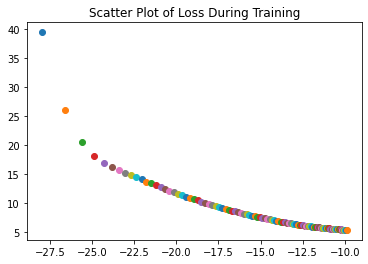

In [39]:
learning_rate = 0.3
w = np.array([-30.0,6.0])

def lin_reg(x,w):
  return x*w[0] + w[1]

def loss(lin_reg, x, y, w):
  return np.sum(np.square(lin_reg(x, w)-y))/(2*len(x))

def compute_gradients(x, y, w,lin_reg):
  m_grad = np.sum(np.multiply((lin_reg(x, w)-y),x))/len(x) 
  b_grad = np.sum(lin_reg(x,w)-y)/len(x)
  return m_grad, b_grad


def gradient_descent(x, y, w, learning_rate, lin_reg, loss):
  while(True):
    prev_loss = loss(lin_reg, x, y, w)
    m_grad , b_grad = compute_gradients(x, y, w, lin_reg)
    w[0] = w[0] - learning_rate*m_grad
    w[1] = w[1] - learning_rate*b_grad
    plt.scatter(w[0], loss(lin_reg,x,y,w))
    plt.title("Scatter Plot of Loss During Training")
    curr_loss = loss(lin_reg, x, y, w)
    print("Loss: ", curr_loss)
    if (prev_loss - curr_loss < 0.01):
      print("Trained Slope (m): ", w[0])
      print("Trained y-int (b): ", w[1])
      return w

gradient_descent(x, y, w, learning_rate, lin_reg, loss)

**SAME GRADIENT DESCENT AS ABOVE, BUT THIS VISUALIZES THE LINEAR REGRESSION REFINING PROCESS:**

current weights:  [-27.97456206   8.925     ]
current loss:  39.4348405274543


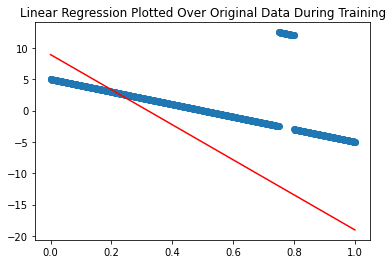

current weights:  [-26.59051929  10.66868431]
current loss:  25.961115826671396


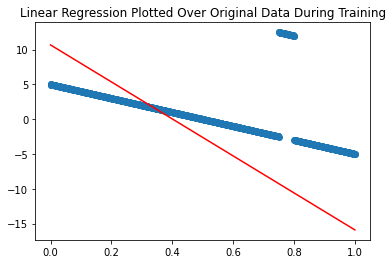

current weights:  [-25.60650272  11.68165691]
current loss:  20.486018655515398


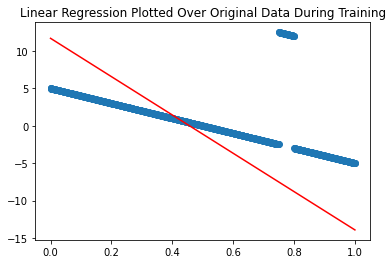

current weights:  [-24.87288294  12.24313524]
current loss:  18.094494983047937


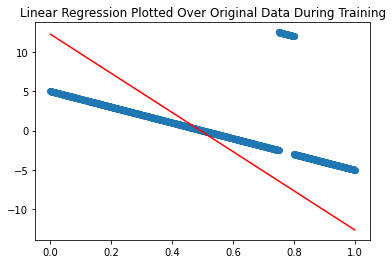

current weights:  [-24.2968836   12.52612711]
current loss:  16.89849686569561


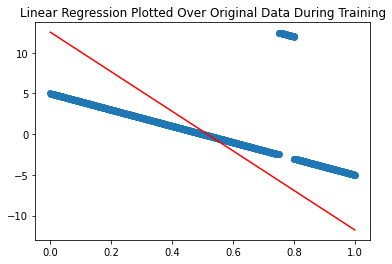

current weights:  [-23.82096181  12.63782152]
current loss:  16.17249210237592


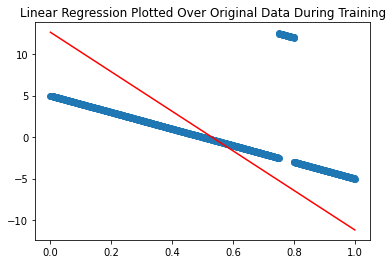

current weights:  [-23.40941018  12.64461934]
current loss:  15.637420770661297


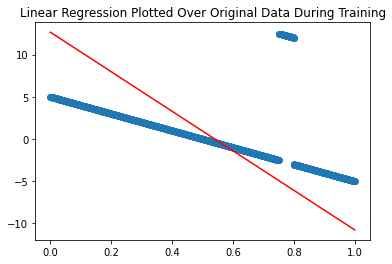

current weights:  [-23.04005399  12.58764506]
current loss:  15.185703724856472


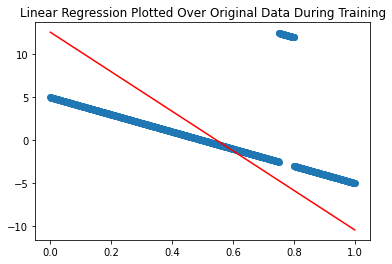

current weights:  [-22.69910576  12.49235964]
current loss:  14.775633635483594


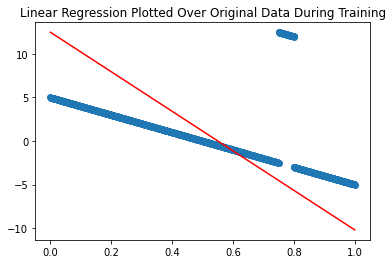

current weights:  [-22.3779766   12.37451761]
current loss:  14.390816078545537


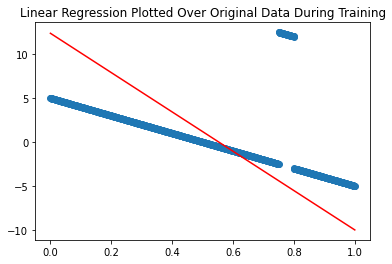

current weights:  [-22.07130013  12.24385882]
current loss:  14.02459260598648


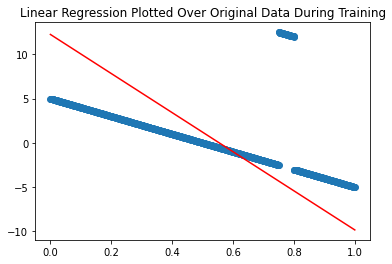

current weights:  [-21.77570783  12.10639619]
current loss:  13.674057971805505


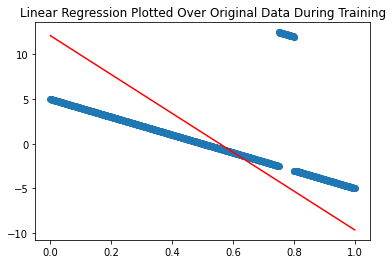

current weights:  [-21.48907016  11.96583351]
current loss:  13.337761940302505


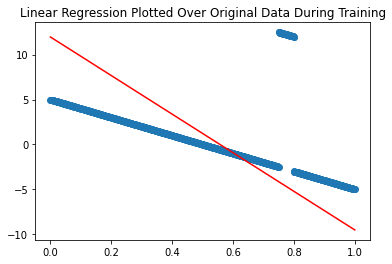

current weights:  [-21.21002621  11.82444398]
current loss:  13.014826150637811


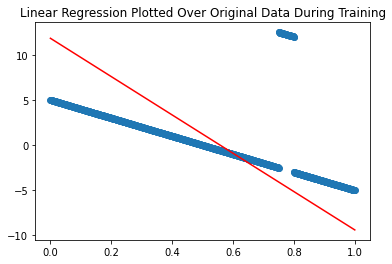

current weights:  [-20.93769218  11.68361472]
current loss:  12.70460444342935


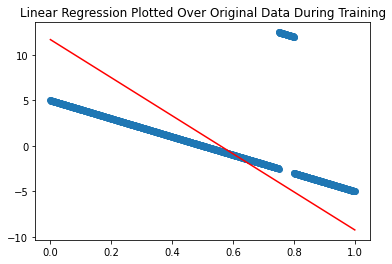

current weights:  [-20.67148081  11.54418413]
current loss:  12.406551919688196


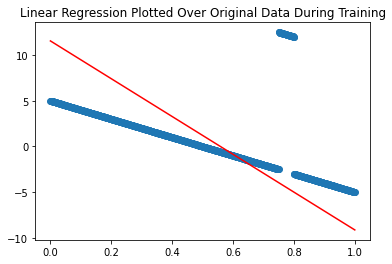

current weights:  [-20.4109893   11.40665101]
current loss:  12.120174181016688


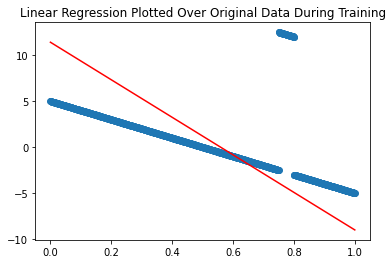

current weights:  [-20.15593001  11.2713041 ]
current loss:  11.845007381292255


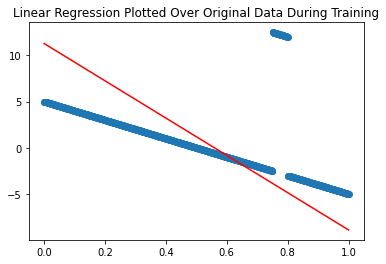

current weights:  [-19.90608739  11.13830237]
current loss:  11.580610129040739


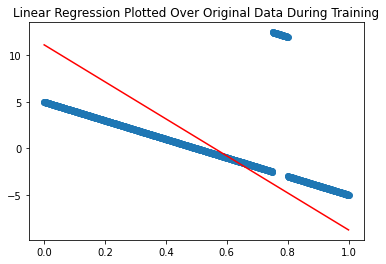

current weights:  [-19.66129127  11.00772477]
current loss:  11.32655995805962


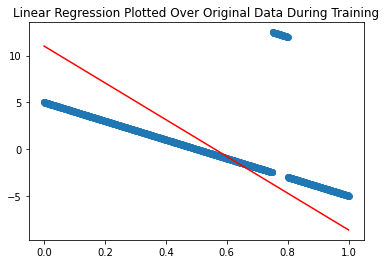

current weights:  [-19.42140037  10.87960103]
current loss:  11.082451568859298


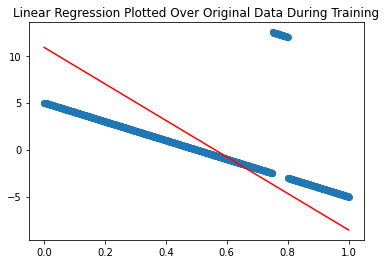

current weights:  [-19.18629201  10.75393078]
current loss:  10.847895765948305


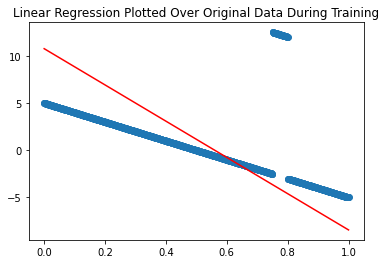

current weights:  [-18.95585571  10.63069534]
current loss:  10.622518677509968


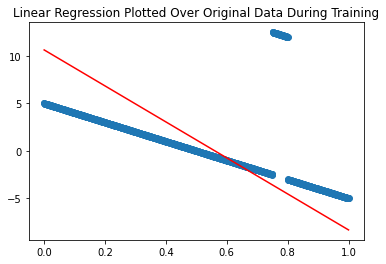

current weights:  [-18.72998927  10.5098651 ]
current loss:  10.40596109809402


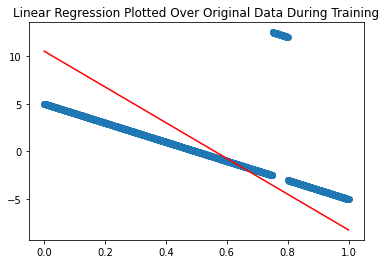

current weights:  [-18.50859623  10.39140396]
current loss:  10.197877892546103


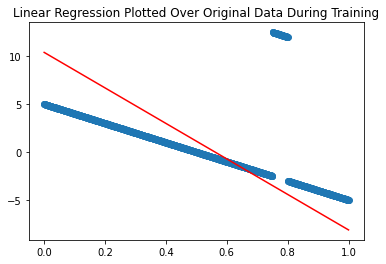

current weights:  [-18.29158441  10.27527221]
current loss:  9.997937436902385


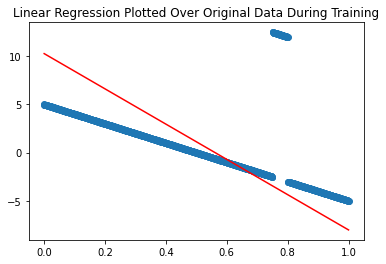

current weights:  [-18.07886487  10.1614282 ]
current loss:  9.80582108640139


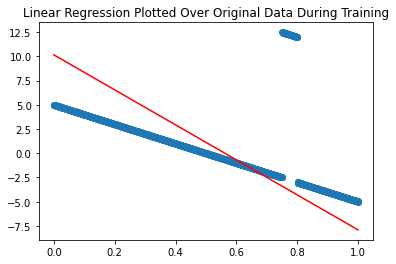

current weights:  [-17.87035133  10.04982947]
current loss:  9.621222666325348


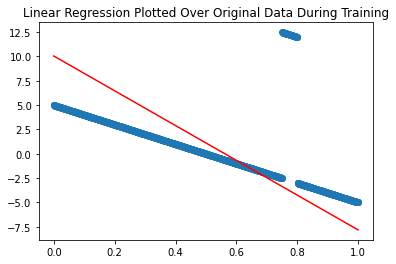

current weights:  [-17.66595977   9.94043333]
current loss:  9.44384798353861


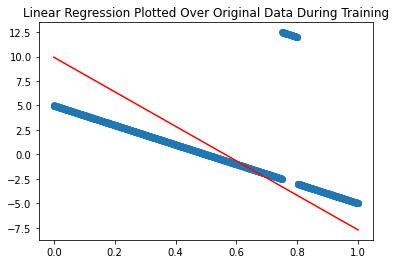

current weights:  [-17.46560817   9.8331973 ]
current loss:  9.273414357437328


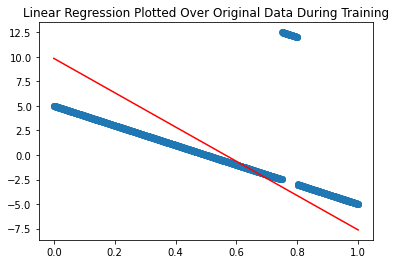

current weights:  [-17.26921636   9.72807933]
current loss:  9.109650169368036


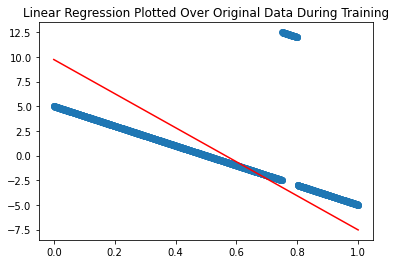

current weights:  [-17.07670586   9.62503799]
current loss:  8.952294429722214


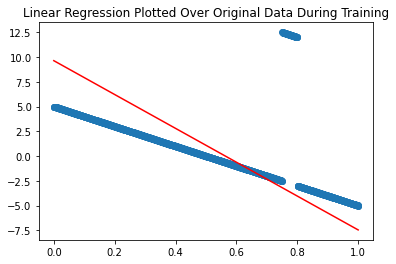

current weights:  [-16.88799985   9.52403247]
current loss:  8.801096361988181


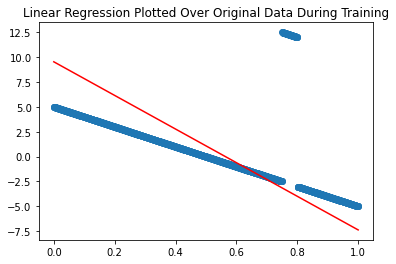

current weights:  [-16.70302305   9.42502271]
current loss:  8.655815003086431


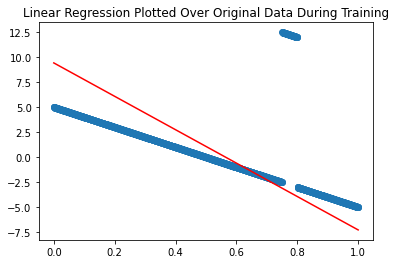

current weights:  [-16.52170173   9.32796935]
current loss:  8.516218819347152


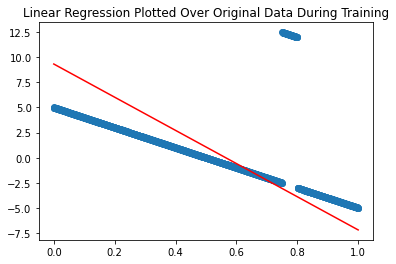

current weights:  [-16.34396361   9.23283381]
current loss:  8.382085337516346


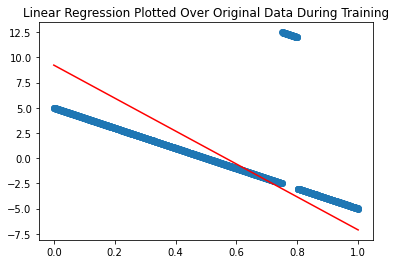

current weights:  [-16.16973787   9.1395782 ]
current loss:  8.253200790201866


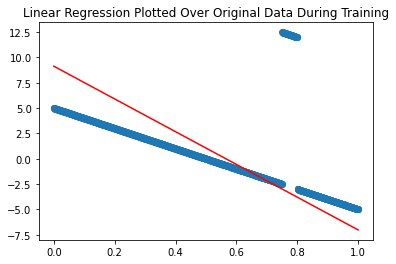

current weights:  [-15.99895508   9.04816542]
current loss:  8.129359775194025


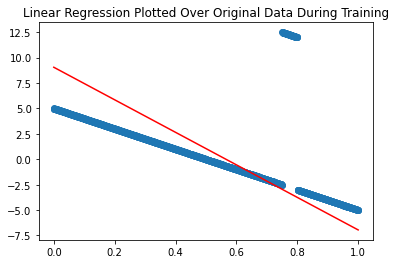

current weights:  [-15.8315472    8.95855906]
current loss:  8.010364928117808


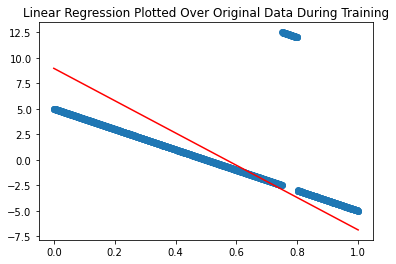

current weights:  [-15.66744753   8.87072342]
current loss:  7.896026607894926


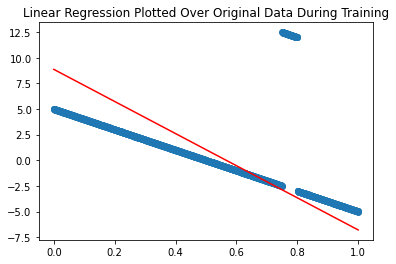

current weights:  [-15.5065907    8.78462352]
current loss:  7.786162594514443


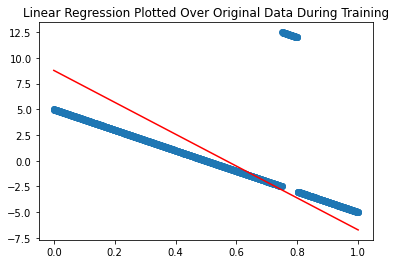

current weights:  [-15.34891261   8.70022507]
current loss:  7.680597798630277


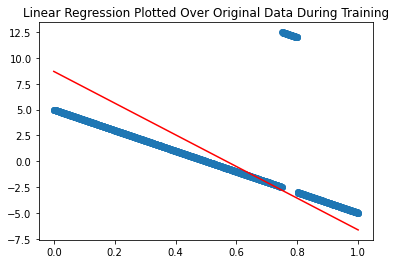

current weights:  [-15.19435046   8.61749444]
current loss:  7.579163982522792


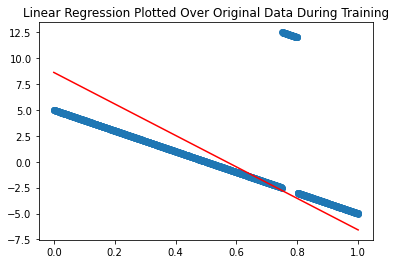

current weights:  [-15.04284267   8.53639868]
current loss:  7.481699491979789


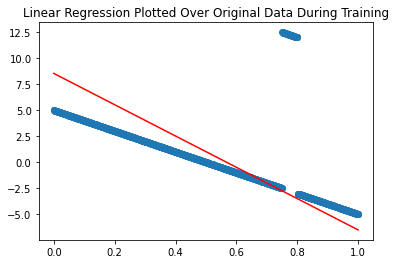

current weights:  [-14.89432887   8.45690548]
current loss:  7.388048998669532


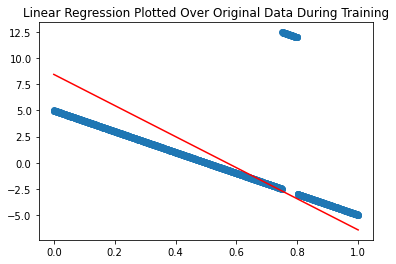

current weights:  [-14.74874991   8.37898316]
current loss:  7.298063252595331


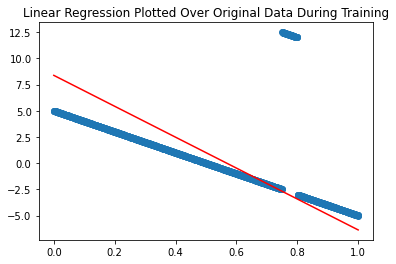

current weights:  [-14.60604778   8.3026007 ]
current loss:  7.211598844237068


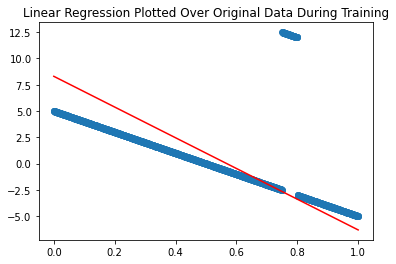

current weights:  [-14.46616564   8.22772766]
current loss:  7.128517976000676


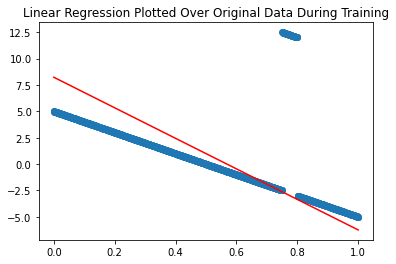

current weights:  [-14.32904775   8.15433421]
current loss:  7.048688242611266


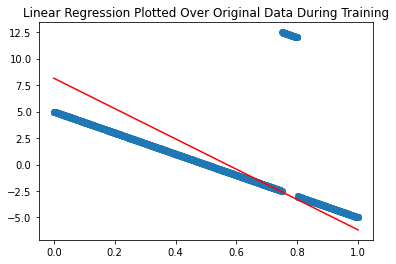

current weights:  [-14.1946395    8.08239111]
current loss:  6.971982420099982


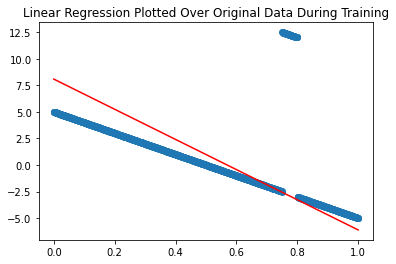

current weights:  [-14.06288734   8.0118697 ]
current loss:  6.8982782630482316


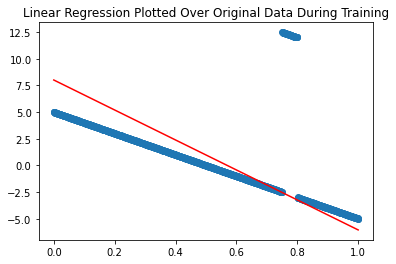

current weights:  [-13.93373878   7.94274189]
current loss:  6.827458309766192


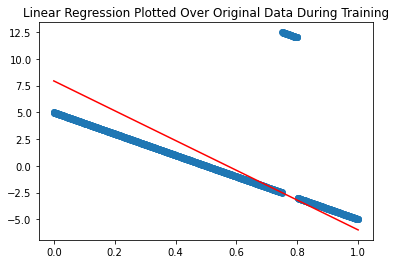

current weights:  [-13.80714236   7.87498014]
current loss:  6.759409695095136


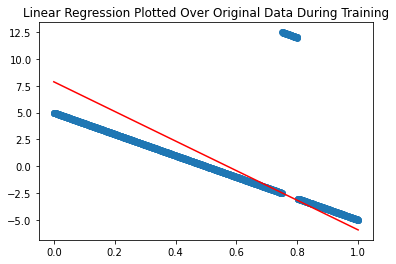

current weights:  [-13.68304766   7.80855745]
current loss:  6.69402397053515


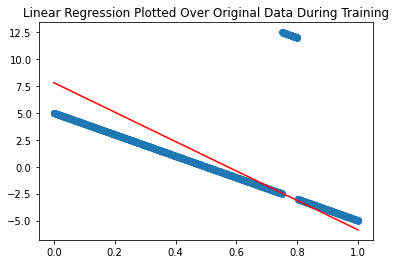

current weights:  [-13.56140524   7.74344737]
current loss:  6.631196931411716


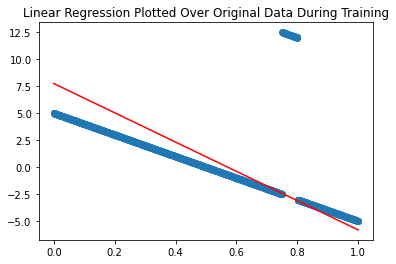

current weights:  [-13.44216664   7.67962394]
current loss:  6.570828450805578


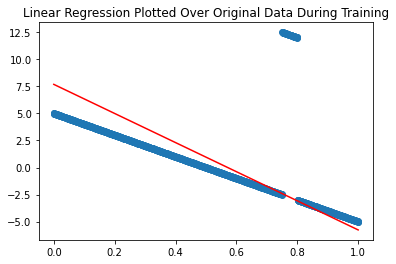

current weights:  [-13.32528435   7.61706175]
current loss:  6.512822319981338


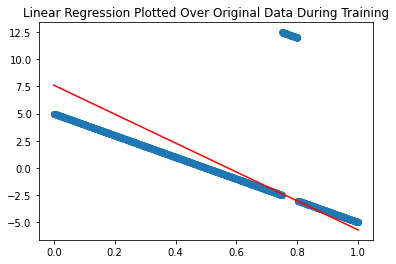

current weights:  [-13.21071181   7.55573588]
current loss:  6.457086095060405


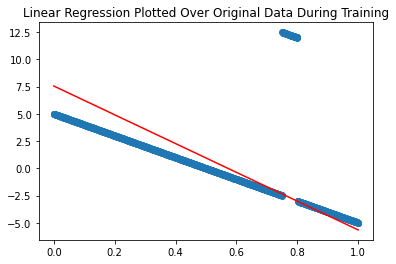

current weights:  [-13.09840337   7.49562189]
current loss:  6.4035309496939625


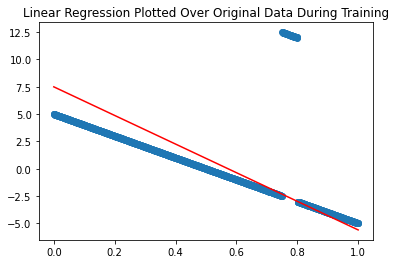

current weights:  [-12.98831431   7.43669583]
current loss:  6.352071533501182


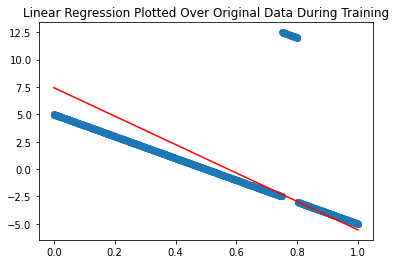

current weights:  [-12.88040075   7.37893423]
current loss:  6.302625836047039


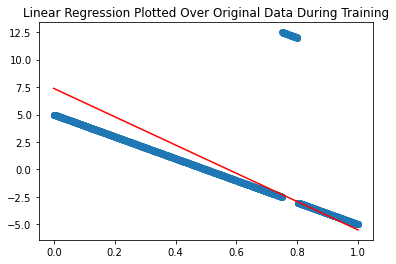

current weights:  [-12.77461971   7.32231407]
current loss:  6.255115056142977


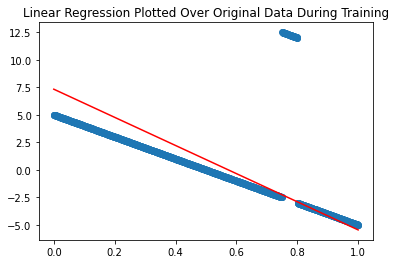

current weights:  [-12.67092904   7.26681281]
current loss:  6.209463476262127


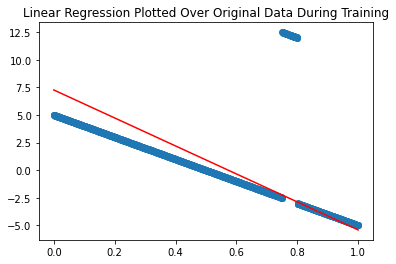

current weights:  [-12.56928744   7.21240832]
current loss:  6.1655983418689235


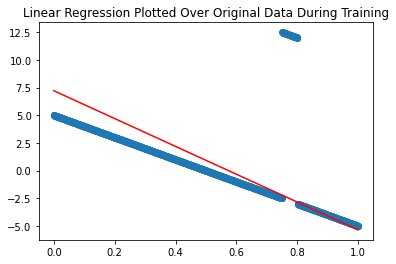

current weights:  [-12.46965441   7.15907894]
current loss:  6.1234497454708166


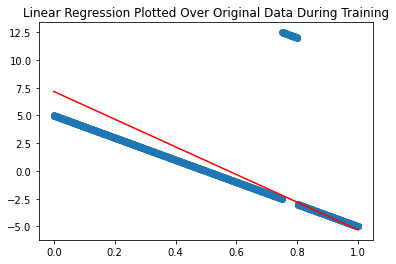

current weights:  [-12.37199027   7.10680342]
current loss:  6.0829505152072985


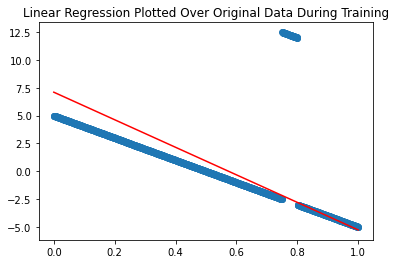

current weights:  [-12.2762561    7.05556093]
current loss:  6.044036107798677


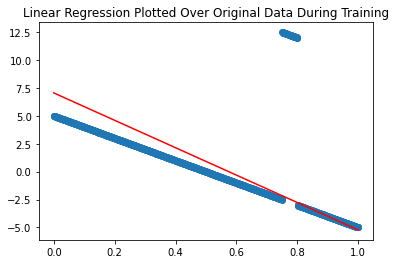

current weights:  [-12.18241377   7.00533107]
current loss:  6.006644505684003


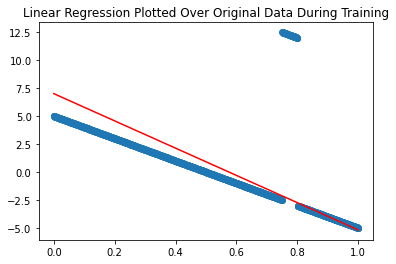

current weights:  [-12.09042588   6.95609381]
current loss:  5.970716118184198


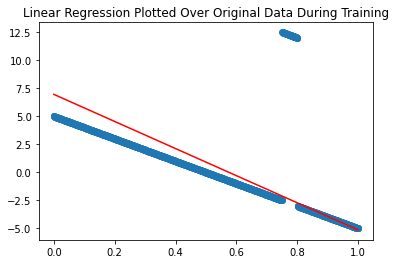

current weights:  [-12.0002558    6.90782955]
current loss:  5.936193686532907


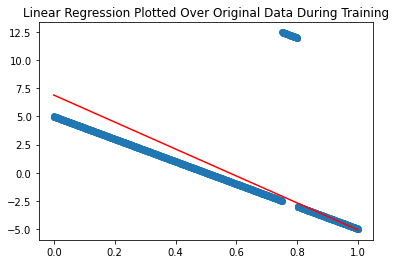

current weights:  [-11.91186761   6.86051906]
current loss:  5.903022192623682


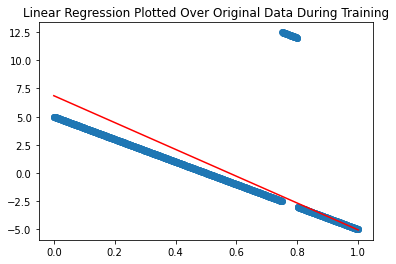

current weights:  [-11.82522608   6.81414348]
current loss:  5.871148771328096


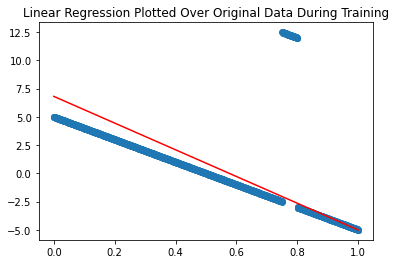

current weights:  [-11.7402967    6.76868435]
current loss:  5.840522626245029


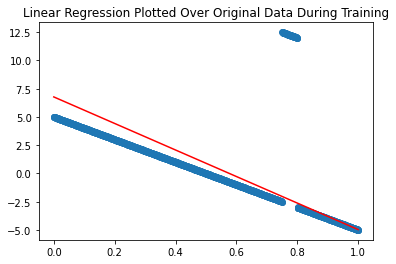

current weights:  [-11.65704565   6.72412355]
current loss:  5.811094948746882


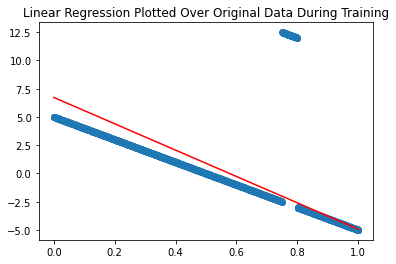

current weights:  [-11.57543974   6.68044333]
current loss:  5.78281884019368


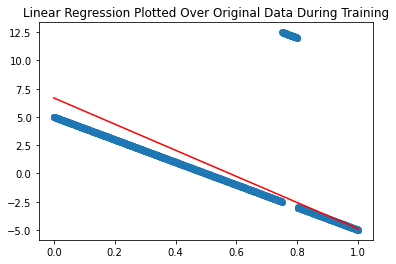

current weights:  [-11.49544648   6.63762629]
current loss:  5.755649237191103


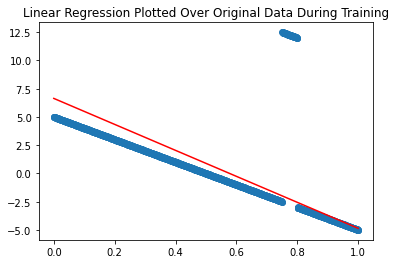

current weights:  [-11.41703399   6.59565538]
current loss:  5.729542839773344


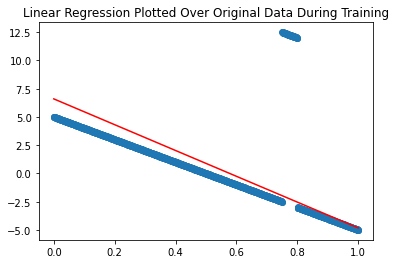

current weights:  [-11.34017104   6.55451386]
current loss:  5.704458042396314


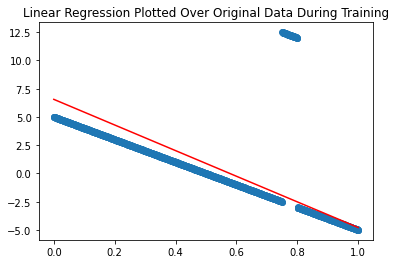

current weights:  [-11.264827     6.51418536]
current loss:  5.680354867631245


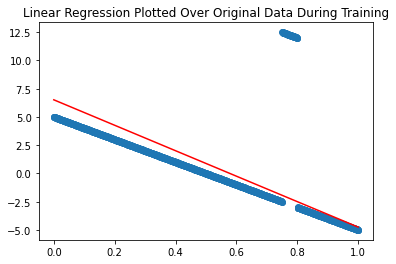

current weights:  [-11.19097187   6.4746538 ]
current loss:  5.657194902452991


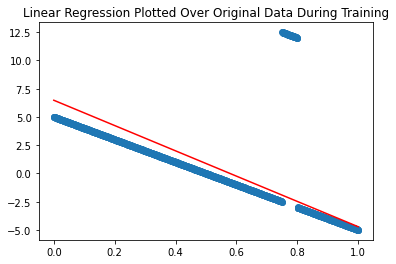

current weights:  [-11.1185762    6.43590344]
current loss:  5.634941237021533


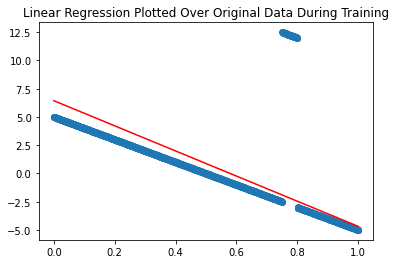

current weights:  [-11.04761118   6.39791884]
current loss:  5.613558405859058


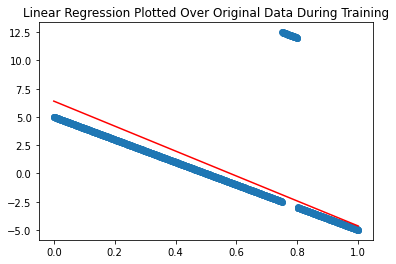

current weights:  [-10.97804852   6.36068486]
current loss:  5.593012331328951


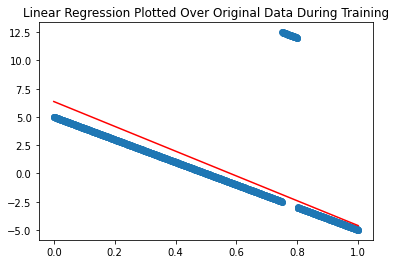

current weights:  [-10.90986051   6.32418668]
current loss:  5.5732702693265335


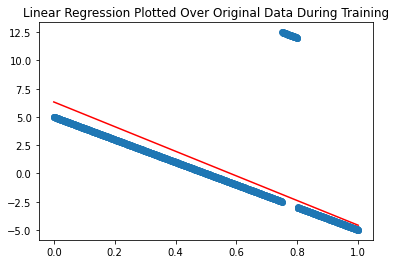

current weights:  [-10.84301998   6.28840975]
current loss:  5.55430075709508


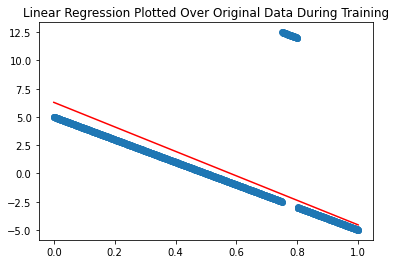

current weights:  [-10.77750032   6.25333982]
current loss:  5.536073563083876


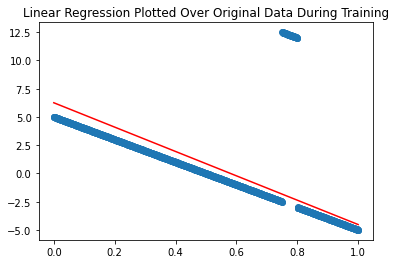

current weights:  [-10.71327541   6.21896292]
current loss:  5.5185596387684575


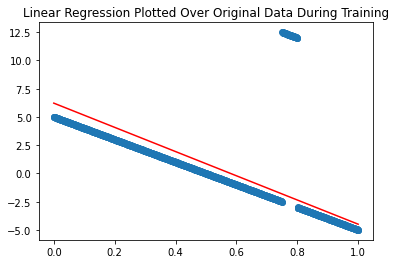

current weights:  [-10.65031967   6.18526536]
current loss:  5.5017310723562245


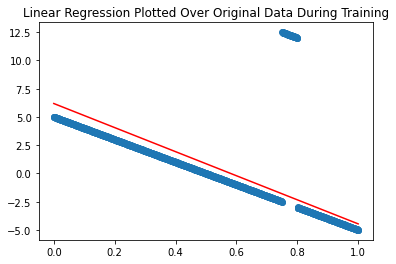

current weights:  [-10.58860802   6.1522337 ]
current loss:  5.485561044303651


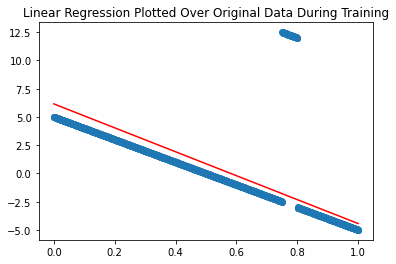

current weights:  [-10.52811588   6.11985479]
current loss:  5.470023784574215


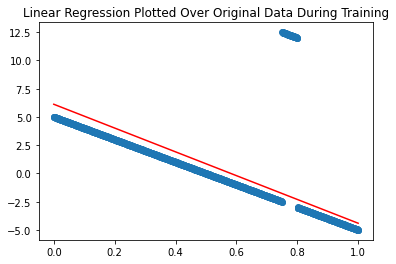

current weights:  [-10.46881914   6.08811574]
current loss:  5.45509453156889


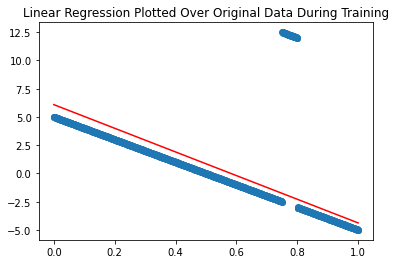

current weights:  [-10.41069418   6.05700389]
current loss:  5.44074949266382


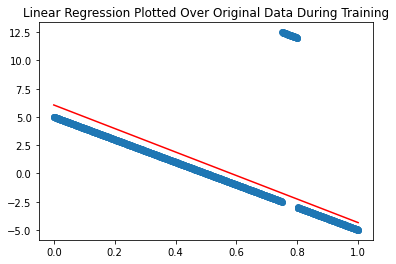

current weights:  [-10.35371786   6.02650685]
current loss:  5.4269658062922


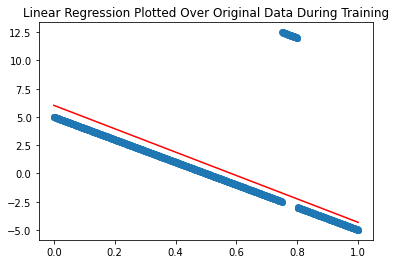

current weights:  [-10.29786746   5.99661247]
current loss:  5.413721505509994


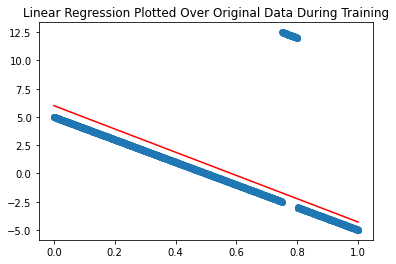

current weights:  [-10.24312074   5.96730885]
current loss:  5.400995482987404


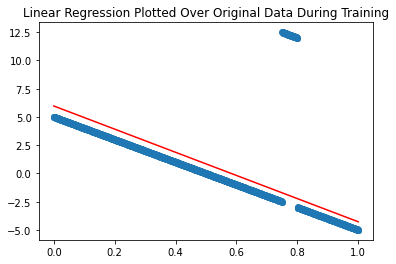

current weights:  [-10.18945589   5.93858431]
current loss:  5.388767457370298


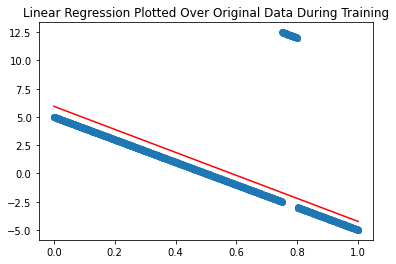

current weights:  [-10.13685152   5.9104274 ]
current loss:  5.37701794095799


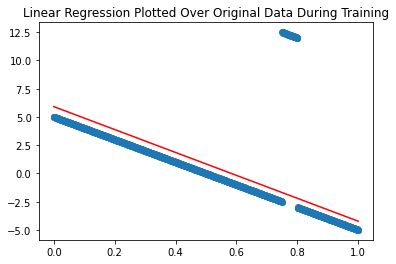

current weights:  [-10.0852867    5.88282691]
current loss:  5.365728208645849


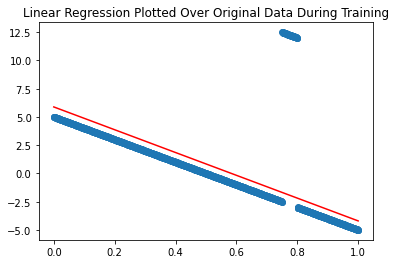

current weights:  [-10.03474086   5.85577184]
current loss:  5.354880268083268


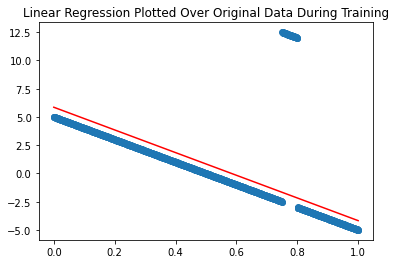

current weights:  [-9.98519387  5.82925142]
current loss:  5.344456830999404


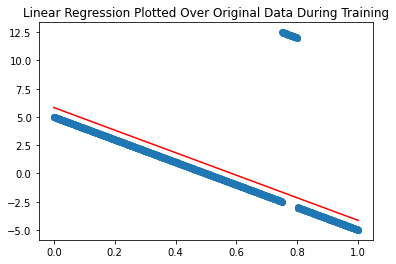

current weights:  [-9.936626    5.80325507]
current loss:  5.334441285651001


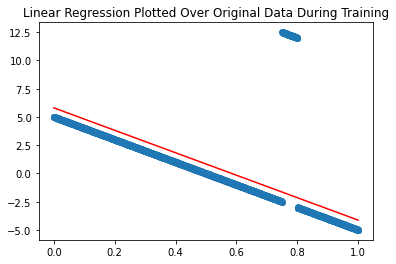

current weights:  [-9.8890179   5.77777245]
current loss:  5.324817670348407


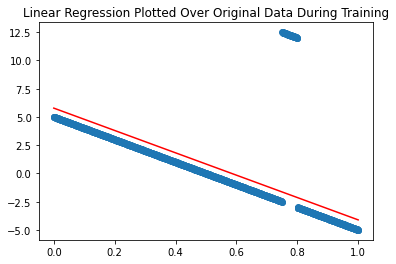

array([-9.8890179 ,  5.77777245])

In [40]:
w = np.array([-30.0,6.0])
def gradient_descent_with_graphs(x, y, w, learning_rate, lin_reg, loss):
  while(True):
    prev_loss = loss(lin_reg, x, y, w)
    m_grad , b_grad = compute_gradients(x, y, w, lin_reg)
    w[0] = w[0] - learning_rate*m_grad
    w[1] = w[1] - learning_rate*b_grad
    print("current weights: ",w)
    print("current loss: " ,loss(lin_reg, x, y, w))
    plt.plot(x, lin_reg(x,w), '-r', label='lin reg approximation')
    plt.scatter(x, y)
    plt.title("Linear Regression Plotted Over Original Data During Training")
    plt.show()
    curr_loss = loss(lin_reg, x, y, w)
    if (prev_loss - curr_loss < 0.01):
      return w

gradient_descent_with_graphs(x, y, w, learning_rate, lin_reg, loss)

# 3. Analyze the result (0.5 points)

Print out the values of `w` and `b` found by your model after training and compare them to the ground truth values (which can be found inside the code of the `generate_data` function).
Are they close?
Recreate the scatter plot you generated in question 1 and plot the model as a line on the same plot.
What went wrong?


Trained Slope (m):  -9.889017895735293 Ground truth slope: -10
Trained y-int (b):  5.777772450085428 Ground truth y-int: 5
Our training came close to approximating the parameters of the data, however, the small discontinuous portion of the data is likely what caused a majority of error in our predictions.


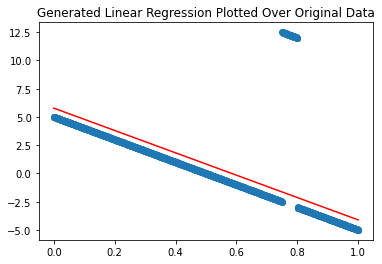

Once again, this graph confirms that the slope is well fited to the majority of the data, however,the remaining offset in the y-int is likely due to the small chunk of data that is discontinuous and higher than the rest.


In [41]:
print("Trained Slope (m): ", w[0], "Ground truth slope: -10")
print("Trained y-int (b): ", w[1], "Ground truth y-int: 5")

print("Our training came close to approximating the parameters of the data, however, the small discontinuous portion of the data is likely what caused a majority of error in our predictions.")

plt.plot(x, lin_reg(x,w), '-r', label='lin reg approximation')
plt.scatter(x, y)
plt.title("Generated Linear Regression Plotted Over Original Data")
plt.show()

print("Once again, this graph confirms that the slope is well fited to the majority of the data, however,the remaining offset in the y-int is likely due to the small chunk of data that is discontinuous and higher than the rest.")

# 4. "Robust" linear regression (1 point)

Implement a linear regression model exactly like the one you created in question 2, except using a L1 loss (absolute difference) instead of a squared L2 loss (squared error).
You should be able to copy and paste your code from question 2 and only change a few lines.
Print out or plot the loss over the course of training.
What is different about the loss trajectory compared to the squared-error linear regression?

Loss:  5.301086311369762
Loss:  4.182527044888182
Loss:  3.976403406370094
Loss:  3.7065056809372536
Loss:  3.491680714330828
Loss:  3.282098595280922
Loss:  3.09038639571765
Loss:  2.9115908091789824
Loss:  2.7461875367574944
Loss:  2.593140217870252
Loss:  2.4519724443724153
Loss:  2.3221506241744057
Loss:  2.2032845076840593
Loss:  2.0950802306567198
Loss:  1.9973799766639904
Loss:  1.9091336022382503
Loss:  1.8269134774586209
Loss:  1.7527473426040412
Loss:  1.6912719068473827
Loss:  1.6440309652615046
Loss:  1.6134978103736457
Loss:  1.5963017705095344
Loss:  1.5805345691056314
Loss:  1.5658059711995689
Loss:  1.5520475628014265
Loss:  1.539195436422913
Loss:  1.5271898942362627
Loss:  1.5159751707771592
Loss:  1.5054991739159942
Loss:  1.4957132428910012
Trained Slope (m):  -9.8692937895998
Trained y-int (b):  5.767214963350801
The Absolute difference loss trajectory followed a more linear path, while the mean squared error loss trajectory followed a more parabolic path.
This mak

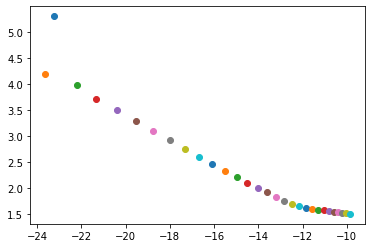

In [42]:
learning_rate = 1
w = np.array([-30.0,6.0])

def lin_reg(x,w):
  return x*w[0] + w[1]

def loss(lin_reg, x, y, w):
  return np.sum(np.absolute(lin_reg(x, w)-y))/len(x)

def compute_gradients(x, y, w,lin_reg):
  m_grad = np.sum(np.multiply((lin_reg(x, w)-y),x))/len(x) 
  b_grad = np.sum(lin_reg(x,w)-y)/len(x)
  return m_grad, b_grad

def gradient_descent(x, y, w, learning_rate, lin_reg, loss):
  while(True):
    prev_loss = loss(lin_reg, x, y, w)
    m_grad , b_grad = compute_gradients(x, y, w, lin_reg)
    w[0] = w[0] - learning_rate*m_grad
    w[1] = w[1] - learning_rate*b_grad
    plt.scatter(w[0], loss(lin_reg,x,y,w))
    curr_loss = loss(lin_reg, x, y, w)
    print("Loss: ", curr_loss)
    if (prev_loss - curr_loss < 0.01):
      print("Trained Slope (m): ", w[0])
      print("Trained y-int (b): ", w[1])
      return w

gradient_descent(x, y, w, learning_rate, lin_reg, loss)
print("The Absolute difference loss trajectory followed a more linear path, while the mean squared error loss trajectory followed a more parabolic path.")
print("This makes sense because they are both linear and quadratic respectively")

**SAME GRADIENT DESCENT AS ABOVE, BUT THIS VISUALIZES THE LINEAR REGRESSION REFINING PROCESS:**

current weights:  [-23.24854021  15.75      ]
current loss:  5.301086311369762


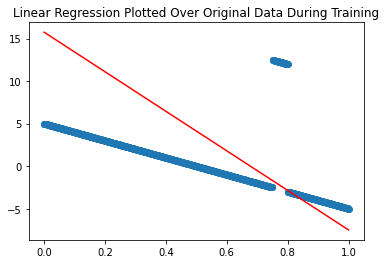

current weights:  [-23.62369338  12.3742701 ]
current loss:  4.182527044888182


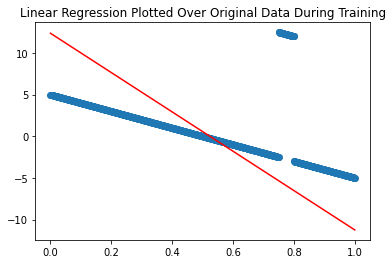

current weights:  [-22.18586796  12.56184669]
current loss:  3.976403406370094


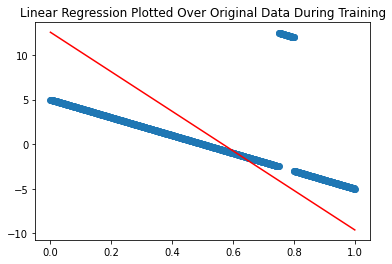

current weights:  [-21.32134585  11.84293398]
current loss:  3.7065056809372536


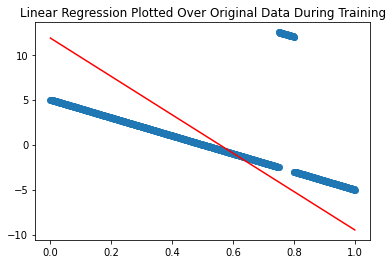

current weights:  [-20.38568566  11.41067293]
current loss:  3.491680714330828


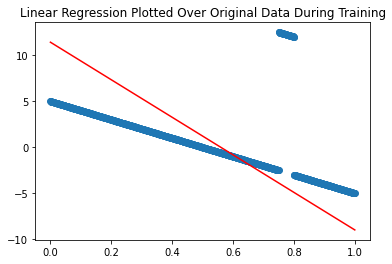

current weights:  [-19.54593776  10.94284283]
current loss:  3.282098595280922


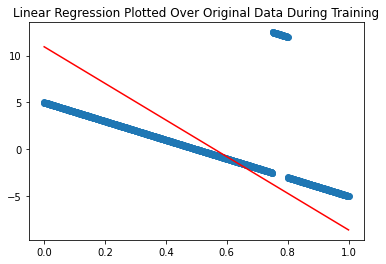

current weights:  [-18.75233088  10.52296888]
current loss:  3.09038639571765


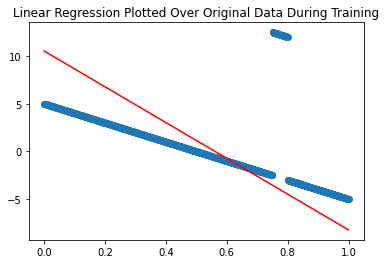

current weights:  [-18.01345506  10.12616544]
current loss:  2.9115908091789824


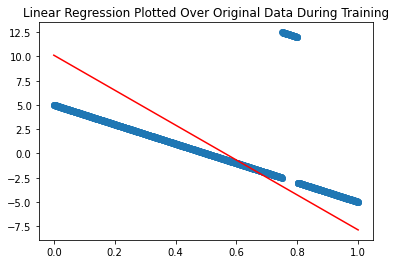

current weights:  [-17.32259272   9.75672753]
current loss:  2.7461875367574944


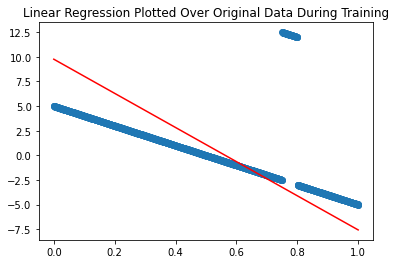

current weights:  [-16.67741414   9.41129636]
current loss:  2.593140217870252


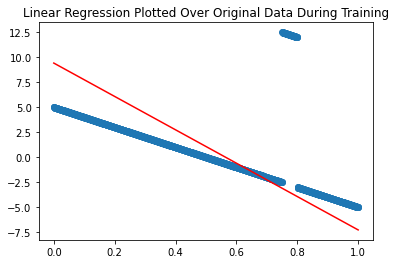

current weights:  [-16.07468713   9.08870707]
current loss:  2.4519724443724153


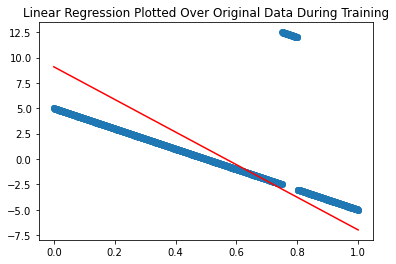

current weights:  [-15.51167504   8.78734357]
current loss:  2.3221506241744057


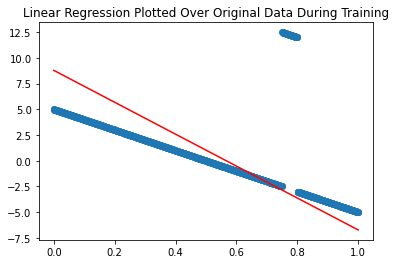

current weights:  [-14.98574582   8.50583752]
current loss:  2.2032845076840593


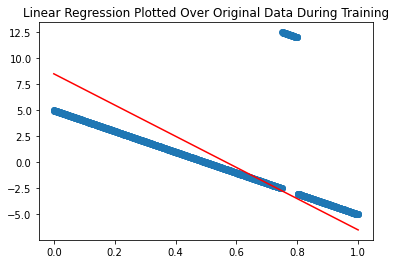

current weights:  [-14.49446106   8.24287291]
current loss:  2.0950802306567198


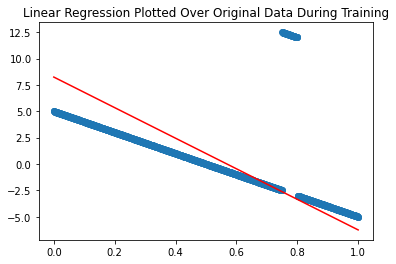

current weights:  [-14.03553755   7.99723053]
current loss:  1.9973799766639904


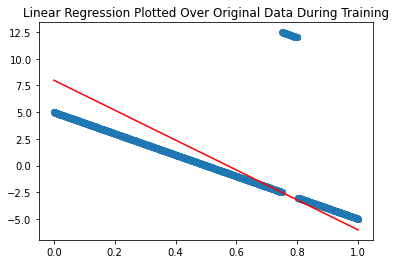

current weights:  [-13.60684391   7.76776877]
current loss:  1.9091336022382503


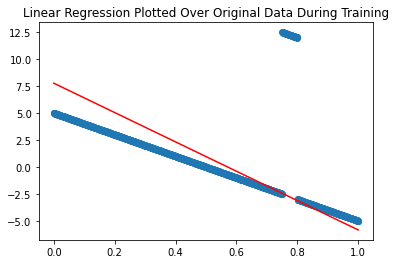

current weights:  [-13.20638879   7.55342195]
current loss:  1.8269134774586209


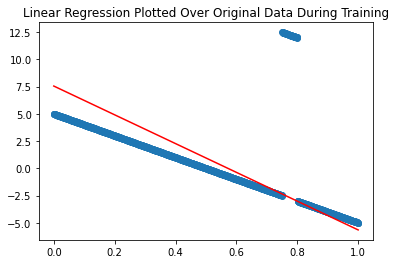

current weights:  [-12.83231212   7.3531944 ]
current loss:  1.7527473426040412


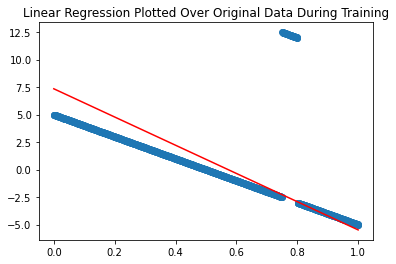

current weights:  [-12.4828763    7.16615606]
current loss:  1.6912719068473827


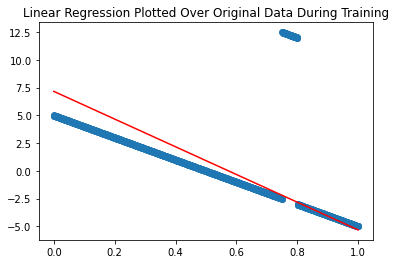

current weights:  [-12.15645821   6.99143815]
current loss:  1.6440309652615046


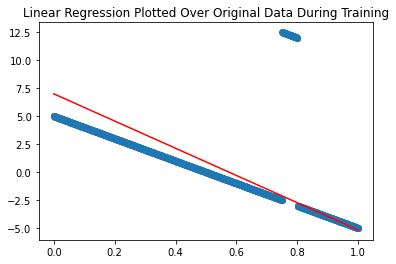

current weights:  [-11.85154165   6.8282291 ]
current loss:  1.6134978103736457


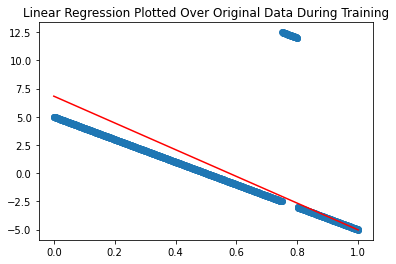

current weights:  [-11.5667103    6.67577083]
current loss:  1.5963017705095344


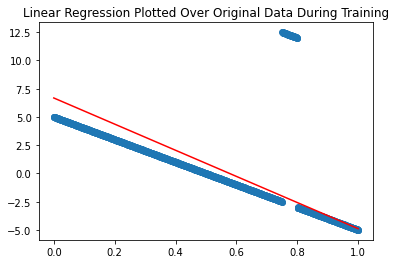

current weights:  [-11.30064111   6.53335515]
current loss:  1.5805345691056314


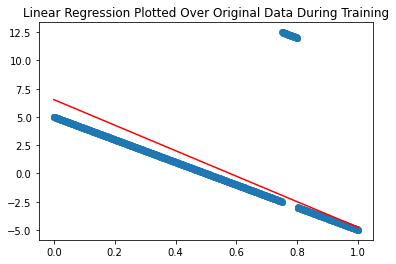

current weights:  [-11.0520982    6.40032056]
current loss:  1.5658059711995689


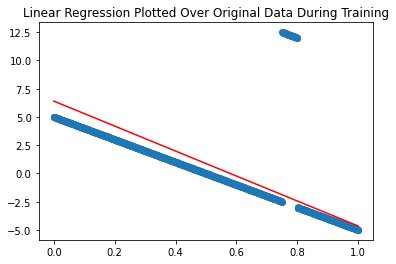

current weights:  [-10.8199271   6.2760491]
current loss:  1.5520475628014265


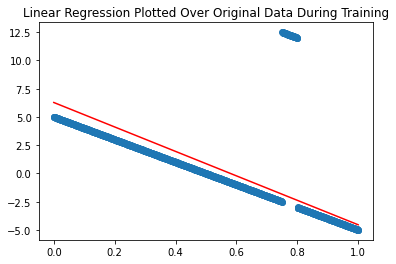

current weights:  [-10.60304937   6.15996355]
current loss:  1.539195436422913


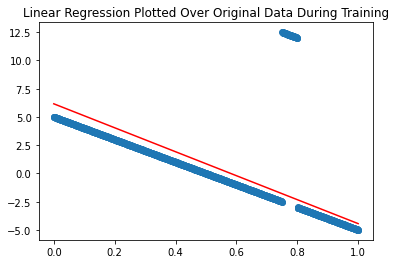

current weights:  [-10.40045762   6.05152468]
current loss:  1.5271898942362627


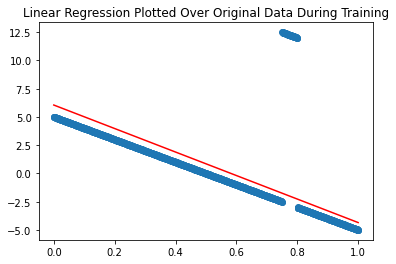

current weights:  [-10.21121082   5.95022881]
current loss:  1.5159751707771592


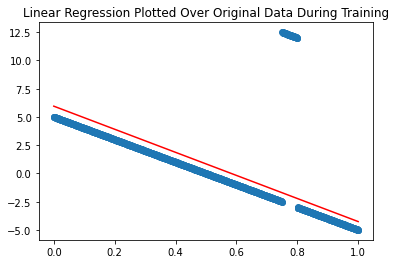

current weights:  [-10.03442993   5.85560541]
current loss:  1.5054991739159942


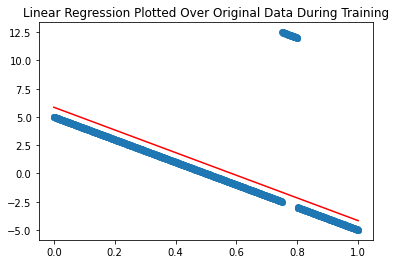

current weights:  [-9.86929379  5.76721496]
current loss:  1.4957132428910012


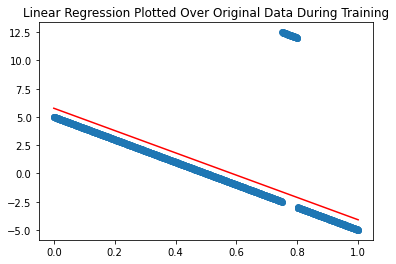

array([-9.86929379,  5.76721496])

In [43]:
w = np.array([-30.0,6.0])
def gradient_descent_with_graphs(x, y, w, learning_rate, lin_reg, loss):
  while(True):
    prev_loss = loss(lin_reg, x, y, w)
    m_grad , b_grad = compute_gradients(x, y, w, lin_reg)
    w[0] = w[0] - learning_rate*m_grad
    w[1] = w[1] - learning_rate*b_grad
    print("current weights: ",w)
    print("current loss: " ,loss(lin_reg, x, y, w))
    plt.plot(x, lin_reg(x,w), '-r', label='lin reg approximation')
    plt.scatter(x, y)
    plt.title("Linear Regression Plotted Over Original Data During Training")
    plt.show()
    curr_loss = loss(lin_reg, x, y, w)
    if (prev_loss - curr_loss < 0.01):
      return w

gradient_descent_with_graphs(x, y, w, learning_rate, lin_reg, loss)

# 5. Analyze the result (0.5 points)

Print out the new values of `w` and `b` found by your model after training.
Are they closer to the true values used in `generate_data`?
Plot the model as a line again.
Why do you think the behavior is different?

Trained Slope (m):  -9.8692937895998 Ground truth slope: -10
Trained y-int (b):  5.767214963350801 Ground truth y-int: 5
Our training came close to approximating the parameters of the data,
however, the small discontinuous portion of the data is likely what caused a majority of error in our predictions.


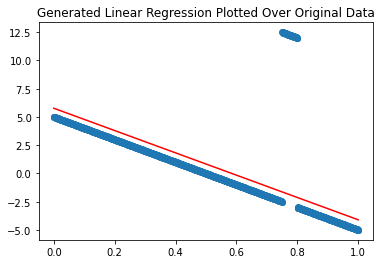

Once again, this graph confirms that the slope is well fited to the majority of the data,
however,the remaining offset in the y-int is likely due to the small chunk of data that is discontinuous and higher than the rest.
This model performed slightly worse than the model using squared error loss.


In [44]:
print("Trained Slope (m): ", w[0], "Ground truth slope: -10")
print("Trained y-int (b): ", w[1], "Ground truth y-int: 5")

print("Our training came close to approximating the parameters of the data,")
print("however, the small discontinuous portion of the data is likely what caused a majority of error in our predictions.")

plt.plot(x, lin_reg(x,w), '-r', label='lin reg approximation')
plt.scatter(x, y)
plt.title("Generated Linear Regression Plotted Over Original Data")
plt.show()

print("Once again, this graph confirms that the slope is well fited to the majority of the data,")
print("however,the remaining offset in the y-int is likely due to the small chunk of data that is discontinuous and higher than the rest.")
print("This model performed slightly worse than the model using squared error loss.")

I think the model we generated for the data using the absolute difference loss is different from the model we generated using the mean squared error loss becuase of the variation in the loss functions we used. Through my experience of tuning the hyper-parameters I found that the absolute difference loss model was more likely to over shoot our target and never converge if I made the learning rate small, while the squared error loss was a little more robust (and produced decent results) with a wider range of tuned hyper-parameters.